In [1]:
# Import the required libraries and dependencies
import numpy as np
import pandas as pd

In [2]:
# Read the data from the apple-price.csv file into a Pandas DataFrame
df_stock = pd.read_csv(
    "../Resources/aapl-price.csv", 
    index_col="date", 
    parse_dates=True, 
    infer_datetime_format=True
)

# Review the DataFrame
df_stock.head()

C:\Users\antho\AppData\Local\Temp\ipykernel_10380\597171049.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_stock = pd.read_csv(


,close
date,
2015-10-19,27.93
2015-10-20,28.44
2015-10-21,28.44
2015-10-22,28.88
2015-10-23,29.77


In [3]:
# Read the data from the apple-trends.csv file into a Pandas DataFrame
df_trends = pd.read_csv(
    "../Resources/apple-trends.csv", 
    index_col="date", 
    parse_dates=True, 
    infer_datetime_format=True
)

# Review the DataFrame
df_trends.head()

C:\Users\antho\AppData\Local\Temp\ipykernel_10380\98708399.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_trends = pd.read_csv(


,trend-worldwide
date,
2015-10-23,32
2015-10-30,33
2015-11-06,32
2015-11-13,32
2015-11-20,31


#### Step 2: Concatenate the `df_stock` DataFrame to the `df_trends` DataFrame, creating a single DataFrame named `df_apple`.

> **Rewind** Concatenation: Two DataFrames that have the same `datetime` index can be merged using `pd.concat`. The `axis=1` parameter means that we're bringing the columns of the two DataFrames together.

In [17]:
# Concatenate Apple's stock price and Google trends data
# Use a parameter of axis=1 to ensure the concatenation by columns
# Chain the dropna function to remove any rows of data that do not 
# contain information in both columns
df_apple = pd.concat([df_stock, df_trends], axis=1).dropna()
df_apple2=df_trends.merge(df_stock, on='date',how='inner').dropna()

# Review the df_apple DataFrame
df_apple.head()
# df_apple2.head()

,close,trend-worldwide
date,,
2015-10-23,29.77,32.0
2015-10-30,29.88,33.0
2015-11-06,30.27,32.0
2015-11-13,28.09,32.0
2015-11-20,29.83,31.0


In [12]:
df_apple.dtypes

close              float64
trend-worldwide    float64
dtype: object

In [18]:
df_apple2.head()

,trend-worldwide,close
date,,
2015-10-23,32,29.77
2015-10-30,33,29.88
2015-11-06,32,30.27
2015-11-13,32,28.09
2015-11-20,31,29.83


In [11]:
df_apple2.dtypes

close              float64
trend-worldwide      int64
dtype: object

### Step 3: Create a plot of the concatenated DataFrame and analyze any trends and correlations. Do you observe any seasonal patterns?

> **Hint** You might find it useful to refer to the [Apple Events page](https://www.apple.com/apple-events/) and the [Timeline of Apple Inc. products](https://en.wikipedia.org/wiki/Timeline_of_Apple_Inc._products) to spotlight moments over time that could have triggered a particular pattern.

<Axes: xlabel='date'>

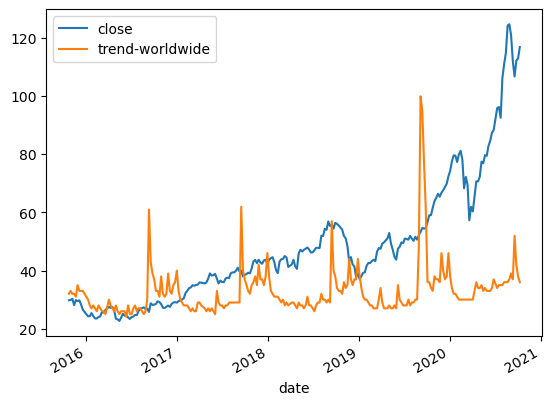

In [19]:
# Use hvplot to visualize the time series data in the df_apple DataFrame
df_apple.plot()

## Building Time Trends

### Step 1: Note that on September 10, 2019, Apple organized an event where it presented the new iPhone 11 family, the Apple Watch Series 5, and a new iPad. This event gained worldwide attention.

### Step 2: Closely examine the data from March 1, 2019 to January 31, 2020.

In [20]:
# Using the df_apple DataFrame, use the loc function to select a
# range of data from March 1st, 2019 to January 31st, 2020
df_spotlight = df_apple.loc["2019-03-01":"2020-01-31"]

# Review the df_spotlight DataFrame
df_spotlight

,close,trend-worldwide
date,,
2019-03-01,43.74,27.0
2019-03-08,43.23,27.0
2019-03-15,46.53,27.0
2019-03-22,47.76,30.0
2019-03-29,47.49,34.0
2019-04-05,49.25,29.0
2019-04-12,49.72,27.0
2019-04-26,51.08,27.0
2019-05-03,52.94,28.0


### Step 3: Create a plot and identify whether both time series indicate a common trend that might correspond to this narrative.

<Axes: xlabel='date'>

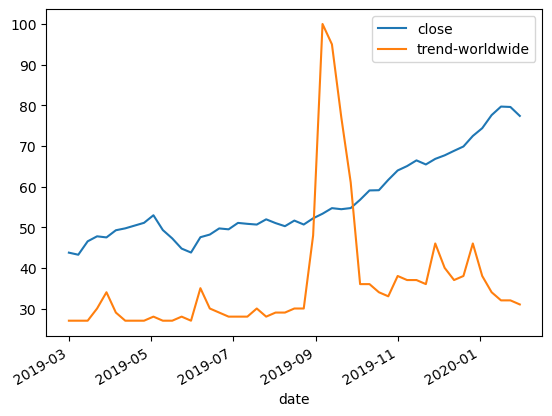

In [21]:
# Visualize the df_spotlight DataFrame
df_spotlight.plot()

### Step 4: Before seeking any correlations between these time series, add columns to the `df_apple` DataFrame to analyze the impact of the Google Trends data on the weekly returns and stock volatility, as follows:

1. Use the Pandas `shift` function to add a new column that lags the Google Trends data by one period.

    > **Hint** Google Trends data is reported every week on Sunday, so you have a weekly period in this time series.

2. Use the Pandas `pct_change` function to add a new column that has the weekly price returns.

3. Compute the rolling stock volatility for Apple by using the following Pandas method:

    `df_apple["weekly_volatility"] = df_apple["close"].pct_change().rolling(window=4).std()`


In [22]:
# Create a column which lags Google trends by one week
# Use the shift function, and move the data down by one row
df_apple["lagged_trends"] = df_apple["trend-worldwide"].shift(1)

In [23]:
# Create a column that contains the Apple weekly return data
# Use the pct_change function to calculate the weekly return values
df_apple["weekly_returns"] = df_apple["close"].pct_change()

In [24]:
# Create a column of Apple weekly rolling stock volatility 
# Chain the pct_function, the rolling function and a 4 period window, and the std function 
df_apple["weekly_volatility"] = df_apple["close"].pct_change().rolling(window=4).std()

In [25]:
# Display the df_apple DataFrame to confirm all columns are present
df_apple.head()

,close,trend-worldwide,lagged_trends,weekly_returns,weekly_volatility
date,,,,,
2015-10-23,29.77,32.0,NaN,NaN,NaN
2015-10-30,29.88,33.0,32.0,0.003695,NaN
2015-11-06,30.27,32.0,33.0,0.013052,NaN
2015-11-13,28.09,32.0,32.0,-0.072019,NaN
2015-11-20,29.83,31.0,32.0,0.061944,0.055367


### Step 5: Use the Pandas `corr` function to compute the correlations among the lagged Google Trends data, the price returns, and the stock volatility. Does any predictable relationship exist?

In [26]:
# Use the corr function to compute the correlation between the lagged Google Trends data, price returns, and stock volatility
df_apple[["lagged_trends", "weekly_returns", "weekly_volatility"]].corr()

,lagged_trends,weekly_returns,weekly_volatility
lagged_trends,1.000000,0.026701,0.004911
weekly_returns,0.026701,1.000000,0.086676
weekly_volatility,0.004911,0.086676,1.000000
